# Exploratory Data Analysis on Box Office Movies

## Overview

As part of its expansion into the entertainment industry, Microsoft, a prominent global technology leader, is exploring the possibility of venturing into film production. This project overview outlines Microsoft's ambitious initiative to create original film content, leveraging its vast resources, technological expertise, and strong brand presence. The objective is to produce compelling and innovative films that captivate a global audience.






##  Business Understanding


Microsoft recognizes the trend among major corporations to invest in original video content and is interested in joining this endeavor. The company is considering establishing a new movie studio but acknowledges its lack of experience in the film industry. To address this, This project conducts a thorough Exploratory Data analysis of the current top-performing films at the box office. The objective is to translate these findings into actionable insights that will guide the decision-making process for Microsoft's new movie studio.








## Data Understanding


The project utilizes one dataset, the bom.movie_gross.csv.

**bom.movie_gross.csv**
**Source:** This data comes from The Numbers website.

**Contents:**  
a. Title: This column contains the names of the movies.

b. Studio: This column indicates the studio that produced the movie. 

c. Domestic Gross: This column shows the domestic gross revenue of the movies in dollars. 

d. Foreign Gross: This column details the foreign gross revenue of the movies. 

e. Year: The year of the movie release is listed in this column. 



### Data Analytic Questions
 **1 . What are the top 10 highest-grossing films in domestic markets?**

**Relevance:** This question aims to identify which films have generated the most revenue. Understanding which films are more profitable 
     can guide Microsoft in selecting the types of films to produce locally, ensuring a higher probability of financial success. 

2. **Which are the top 10 films in foreign market gross revenue?**

 **Relevance:** This question focuses on uncovering the films with the highest earnings in international markets. Understanding these top performers is crucial for Microsoft to shape its film production strategy, aiming to replicate similar success in overseas markets.

3. **a)Which are the top 10 studios that have produced the most financially successful films based on box office performance?**

   **b)What is the distribution of the total gross revenue of the leading studio?**

   **c) What are the top 5 movies based on total gross revenue by the leading studio?**
   
 **Relevance**: This analysis will provide key insights into the success strategies of leading film studios, crucial for Microsoft's strategic entry into the film industry. It will empower the board members to make decisions that enhance our company's growth and market presence.



### Metric of Success


The metric of success is a s follow:

 1. Top 10 highest-grossing films in domestic markets: 
    Metric: This is measured by their total domestic box office gross revenue.

2. Top 10 highest-grossing films in foreign markets: :
   Metric: This is measured by their total domestic box office gross revenue.
   
3. Top 10 studios that have produced the most financially successful films
   Metric: This is measured by the total domestic and foreign box office gross revenue.

## Experimental Design

1. Data Cleaning and Preparation 
2. Data Visualization and Descriptive Analysis on the top 10 highest-grossing films in domestic earnings, foreign earnings, and top 10 
   studios that have produced the most financially successful films. Data Visualization: Use graphs and charts to visualize data and 
   generate insights.
3. Analysis and Recommendations: Summarize key insights about the most successful genres and provide recommendations for movie production or 
   acquisition strategies based on the analysis.

### Data Cleaning and Preparation


In [1]:
import pandas as pd            
import numpy as np              
import matplotlib.pyplot as plt 
import seaborn as sns           
%matplotlib inline

In [2]:
# Loading the datasets using pandas
movies = pd.read_csv("bom.movie_gross.csv")

#previewing the top of the dataset
movies.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
#previewing the bottom of the dataset
movies.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


In [4]:
# Determining the no. of records in our dataset
movies.shape



(3387, 5)

In [5]:
# Checking whether each column has an appropriate datatype
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
# The foreign_gross column contains commas in the numbers, so we need to
#replace with '' and convert the foreign_gross column to float

movies['foreign_gross'] = movies['foreign_gross'].str.replace(',', '').astype(float)


In [7]:
#Checking the data types
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


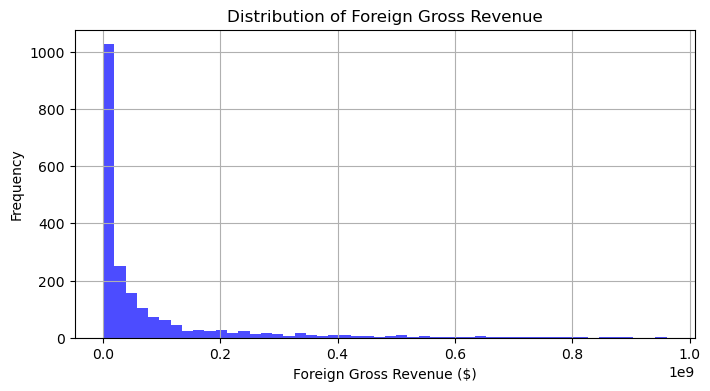

In [8]:

# Plotting a histogram to check the distribution of foreign_gross
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(movies['foreign_gross'].dropna(), bins=50, color='blue', alpha=0.7)
ax.set_title('Distribution of Foreign Gross Revenue')
ax.set_xlabel('Foreign Gross Revenue ($)')
ax.set_ylabel('Frequency')
ax.grid(True)
plt.show()


The above distribution  shows a right-skewed distribution where most of the data are clustered towards the left with a long tail to the right. In  order not to lose significant and valuable data on the other columns the median is imputed for the missing foreign values.

In [9]:
# Imputing missing values in foreign_gross with the median
median_foreign_gross = movies['foreign_gross'].median()
movies['foreign_gross'].fillna(median_foreign_gross, inplace=True)


In [10]:
# Checking if the missing values have been imputed
missing_values_after_imputation = movies['foreign_gross'].isnull().sum()
missing_values_after_imputation

0

In [11]:
# Checking for missing values in each column of the dataframe
missing_values_in_dataset = movies.isnull().sum()
missing_values_in_dataset

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [12]:
#dropping rows with missing values
movies.dropna(inplace=True)

In [13]:
# Checking for missing values in each column of the dataframe
missing_values_in_dataset = movies.isnull().sum()
missing_values_in_dataset

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [14]:
# Checking the shape of the cleaaned dataframe after dropping missing values
movies.shape

(3356, 5)

In [15]:
# Create a new column 'total' which is the sum of 'domestic_gross' and 'foreign_gross'
movies['total'] = (movies['domestic_gross'] + movies['foreign_gross'])/1e9 # compute the total to billions
movies.head(2)

,title,studio,domestic_gross,foreign_gross,year,total
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.0670
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.0255


### Data Analysis

**1 .What are the top 10 highest-grossing films in domestic markets?**


In [16]:
# Preparing data for the top 10 highest-grossing films in domestic markets
top10_domestic = movies.nlargest(10, 'domestic_gross')
top10_domestic 

,title,studio,domestic_gross,foreign_gross,year,total
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,0.936701
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,0.678801
1873,Jurassic World,Uni.,652300000.0,1019.4,2015,0.652301
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016,1.056100
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500
2324,Finding Dory,BV,486300000.0,542300000.0,2016,1.028600


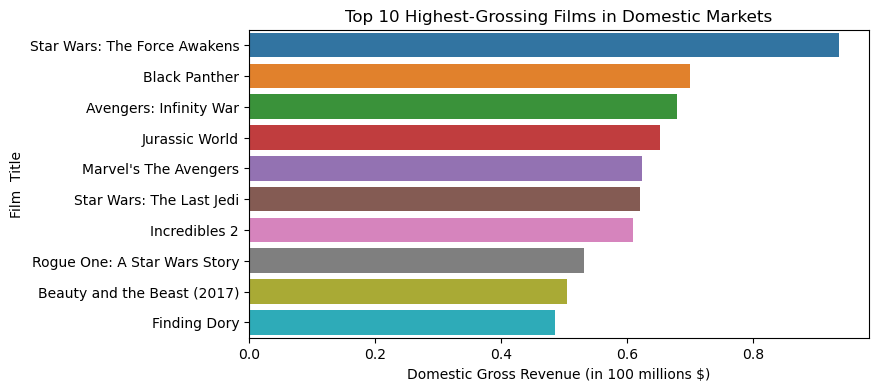

In [17]:
# Creating a horizontal bar chart for the top 10 highest-grossing films in domestic markets
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(x=top10_domestic['domestic_gross'] / 1e9, y='title',hue='title', data=top10_domestic, palette='tab10', 
            ax=ax, legend=False)
ax.set_title('Top 10 Highest-Grossing Films in Domestic Markets')
ax.set_xlabel('Domestic Gross Revenue (in 100 millions $)')
ax.set_ylabel('Film  Title')

plt.show()


### Analysis

In reviewing the domestic revenue performance, the graph shows that science fiction and fantasy films resonate greatly with domestic audiences. Notably, Star Wars: The Force Awakens has achieved remarkable success, with domestic grosses reaching approximately 936.7million. This is complemented by the stronger performances of super hero movies, with Black Panther and Avengers:Infinity War securing around 700million and $678.8 million respectively.

**2. Which are the top 10 films in foreign market gross revenue?**



In [18]:
# Sort the data by 'foreign_gross' and select the top 10 movies
top_10_foreign_gross = movies.sort_values(by='foreign_gross', ascending=False).head(10)


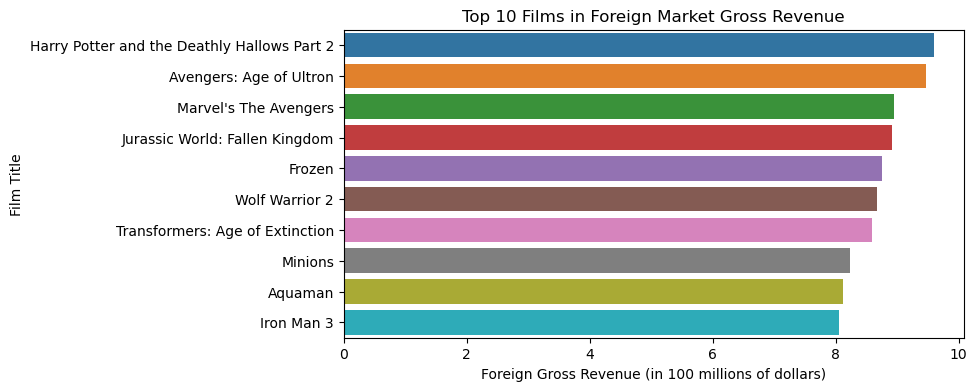

In [19]:
# Create the horizontal bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=top_10_foreign_gross['foreign_gross']/1e8, y='title',hue='title',
                 data=top_10_foreign_gross,palette='tab10')

# Set plot title and labels
ax.set_title('Top 10 Films in Foreign Market Gross Revenue')
ax.set_xlabel('Foreign Gross Revenue (in 100 millions of dollars)')
ax.set_ylabel('Film Title')

# Show the plot
plt.show()

### Analysis

From the graph above, the top three foreign-grossing films include Harry Potter and the Deathly Hallows Part 2 with a gross of 976.9milliom, 
followed by Avengers: Age of Ultron at around 946.4 million, and Marvel’s The Avengers with $896.2 million, underscoring the great appeal
of franchise blockbusters with the global audience. This reflects their consistent ability to captivate foreign audiences and generate substantial foreign gross revenues.

3. **Which are the top 10 studios that have produced the most financially successful films based on box office performance?**

In [20]:
# Grouping by studio and summing the 'total' column
studio_totals = movies.groupby('studio')['total'].sum().sort_values(ascending=False).head(10)

studio_totals

studio
BV         44.250284
Fox        31.042767
WB         31.022949
Uni.       29.813264
Sony       22.479719
Par.       19.680156
WB (NL)    10.353400
LGF         8.875083
LG/S        5.506724
P/DW        5.076500
Name: total, dtype: float64

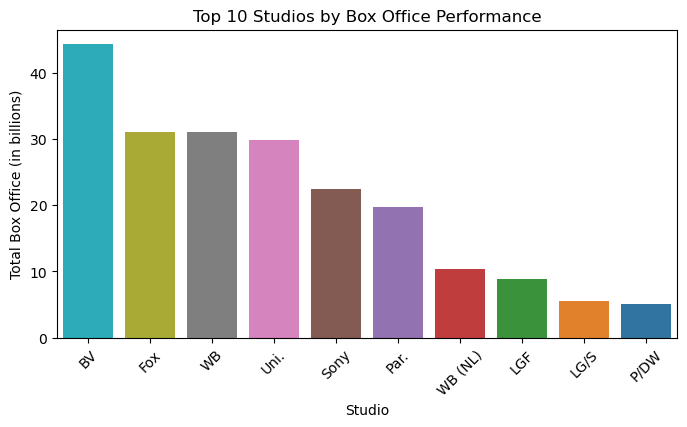

In [21]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=studio_totals.index, y=studio_totals.values,hue =studio_totals.values, ax=ax,palette='tab10',
           legend=False)
ax.set_title('Top 10 Studios by Box Office Performance')
ax.set_ylabel('Total Box Office (in billions)')
ax.set_xlabel('Studio')

plt.xticks(rotation=45)
plt.show()

### Analysis
Bueno Vista(BV), a division of Walt Disney Company has rights to some of the most successful film franchises like "The Avengers",
Avengers: Age of Ultron, Black Panther, and Star Wars: The Last Jedi. These franchises have a massive global fan base, performing 
well at the box office.

b.**What is the distribution of the total gross revenue of BV movies?**

In [22]:
# Using groupby to create bv_movies DataFrame with total gross for each BV movie

#  filtering out only BV movies from the original dataset
bv_movies_grouped = movies[movies['studio'] == 'BV']



In [23]:
# Now group by title and calculate the total gross for each movie
bv_movies_total_gross = bv_movies_grouped.groupby('title')['total'].sum().reset_index()

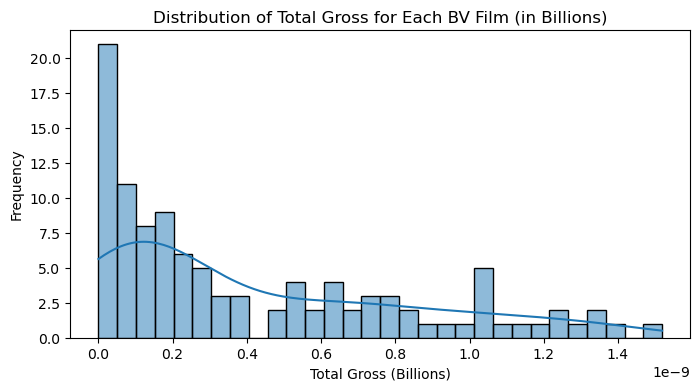

In [24]:
# Plotting the histogram for the total gross of each BV movie
fig, ax = plt.subplots(figsize=(8, 4))
sns.histplot((bv_movies_total_gross['total'])/1e9, bins=30, kde=True, ax=ax)  # Convert total gross to billions

ax.set_title('Distribution of Total Gross for Each BV Film (in Billions)')
ax.set_xlabel('Total Gross (Billions)')
ax.set_ylabel('Frequency')

fig.savefig('Distribution_of_Total_Gross_for_Each-BV_Film_(in Billions).png', bbox_inches='tight')

# Show plot
plt.show()

c. **What is the distribution of the total gross revenue of the leading studio?**

### Analysis


a. Right-Skewed Distribution: The histogram shows a right-skewed distribution, this indicates that most BV films have 
lower total gross earnings, while a few films have exceptionally high earnings.

b. Presence of High Grossing Films: The long tail to the right depicts that there are a small number of films 
with significantly higher total gross earnings. 

c. Majority of Films in Lower Earning Brackets: The concentration of bars on the left side of the histogram shows 
that the majority of BV films earn less in comparison to a few high earners.

c. **What are the top 5 movies based on total gross revenue by the leading studio?**

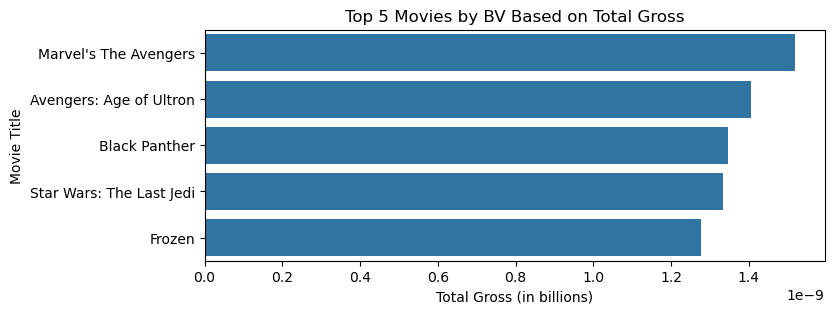

In [25]:
# Plotting a horizontal bar graph for the top 5 movies produced by BV based on total gross

# Sorting the data to get the top 5 movies
top_5_bv_movies = bv_movies_total_gross.sort_values(by='total', ascending=False).head(5)

# Plotting
fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=top_5_bv_movies['total']/1e9, y=top_5_bv_movies['title'], ax=ax)

ax.set_title('Top 5 Movies by BV Based on Total Gross')
ax.set_xlabel('Total Gross (in billions)')
ax.set_ylabel('Movie Title')

# Show plot
plt.show()


### Analysis

1. The top two spots include Marvel's The Avenger and Avengers: Age of Ultron, showing strong appeal for super-heroes
   franchises. Black Panther and Star Wars also reflect the strong presence of well-established franchises grossing over 1 billion dollars in total revenue.

2. Frozen, a family-friendly animated film also depicts the profitability of movies that appeal to all age groups, 

### Recommendations

1. Based on the analysis of domestic revenue performance, it is highly recommended that Microsoft prioritize the production of science fiction and fantasy films, as well as explore opportunities within the superhero genre, given the substantial resonance of these genres with domestic audiences.
   
2. Considering the data depicting the top-performing foreign-grossing films, Microsoft should prioritize the production of franchise blockbusters and concentrate on crafting content that consistently captures the attention of global audiences, as exemplified by the substantial foreign revenue generated by these films.

3. Learning from BV's total gross performance Microsoft should prioritize large-scale productions of franchise Blockbusters and family-friendly films that can become hits and have high total gross earning potential. These films  will drive significant revenue and bolster Microsoft's studio's profile.